<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/homework/HW5/Fall25HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
## Homework guideline
- The deadline is Dec 15th 11am. Submission after the deadline will not be graded.

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_Xu_Yibo.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. If your code runs for **too long (over 15 minutes per question)**, points may be deducted.

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **1 points** bonus will be awarded.

- You only use the Python packages included in the following cell. **You are not allowed to use other advanced package or modules unless you are permitted to.**

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file.

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!


In [14]:
%pylab inline
import numpy.linalg as LA
from scipy.spatial.distance import cdist


## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

Populating the interactive namespace from numpy and matplotlib




---



---


# Q1: Information metric in Decision Tree (20pt)
Given a set of $\mathcal{S}$ with $k$ classes, associated with a Multinomial probability distribution $\mathbf{p}=(p_1, \dots, p_k)$ with $\sum_{i}p_i =1$,

- the Entropy is defined as
  $$ H(\mathcal{S}) = -\sum_{i=1}^k p_i\log_2 p_i$$
  Note the logarithm is base 2 instead of base $e$;

- the Gini impurity is defined as
$$\text{gini}(\mathcal{S})=\sum_{i=1}^k p_i (1-p_i) = 1-\sum_{i=1}^k p_i^2. $$

 **Prove** that
- $0\le H(\mathcal{S})\le \log_2(k)$. The minimum is reached when $p_i=1$ for some class $i$ (no uncertainty, since all instances are from the same class). The maximum is reached when $p_i=\dfrac{1}{k}$ for all classes
(uniform distribution);

- $0\le \text{gini}(\mathcal{S})\le \dfrac{k-1}{k}$. The minimum is reached when $p_i=1$ for some class $i$ (no uncertainty, since all instances are from the same class). The maximum is reached when $p_i=\dfrac{1}{k}$ for all classes
(uniform distribution).


**Hint:** a sum of convex (concave resp.) function is still convex (condave resp.); a convex (concave resp.) function restricted on a convex set is still convex (concave resp.).





# Your Answer:



---



---


# Q2: Hyperbolic Tangent Neural Networks (20pt)
In a two-layer neural network (one hidden layer) with sigmoid activations, the outputs are given by
$$\vec f(\mathbf{x}; \theta)  = \sigma(\mathbf{W}^{(2)}\sigma(\mathbf{W}^{(1)}\mathbf{x}+\mathbf{b}^{(1)})+\mathbf{b}^{(2)})$$
where $\sigma(a) = \frac{1}{1+\exp(-a)} $. This equation simply combines all the stages of the network into a single
equation. Instead of the sigmoid function, we could use hyperbolic tangent functions
$$ \tanh(a)=\frac{\exp(a)-\exp(-a)}{\exp(a)+\exp(-a)}  $$
as
an activation function.

Consider the two-layer neural network with sigmoid activations described above. **Show** that there exists an
equivalent network, which computes exactly the same function, but with hidden unit activation functions
given by $\tanh(a)$. Define the parameters of your newly constructed network explicitly. You are allowed to
use an additional affine transformation on the output of your tanh network, since the range of $\tanh$ and $\sigma$
are different.

**Hint:** begin by re-writing the equation above with tanh hidden unit activations, then find the relation between
$\sigma(a)$ and $\tanh(a)$, and show that the parameters of the two networks differ by linear transformations.





# Your Answer:


---



---
# Description
In rest of this assignment, we will use the various methods for face recognition. Our task here is to be able to predict the correct label (name of the person) given an image of his face.

We will use the same dataset in the last homework.

Number of images in the dataset: 1140
Number of different persons in the dataset: 5
Each images size is: (62, 47)


/tmp/ipython-input-4000504738.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_to_name_mapping, rotation=-90);


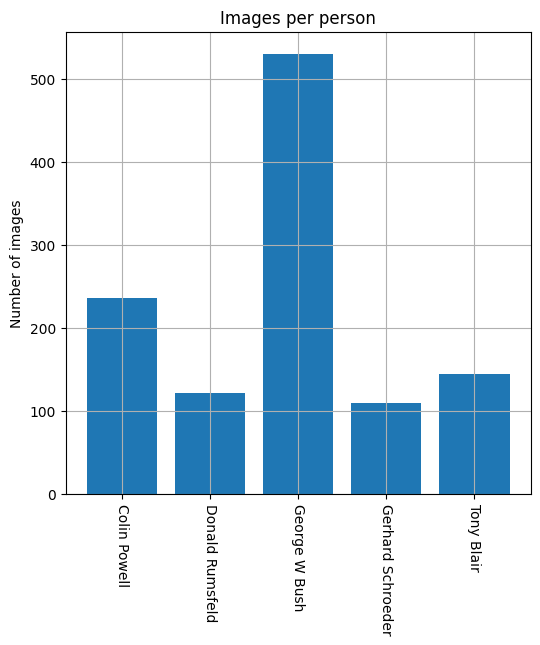

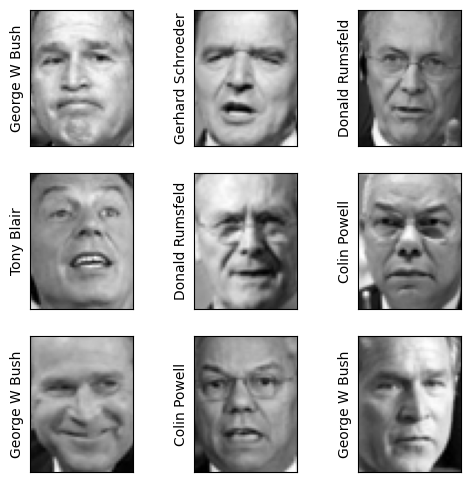

In [15]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=100)

X = dataset.images
y = dataset.target
label_to_name_mapping = dataset.target_names
image_shape = X[0].shape

print('Number of images in the dataset: {}'.format(len(X)))
print('Number of different persons in the dataset: {}'.format(len(np.unique(y))))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')


# plots the first 20 images in the dataset.
fig, ax_array = plt.subplots(3, 3)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [16]:
from sklearn.model_selection import train_test_split
# split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(912, 62, 47)
(228, 62, 47)




---



---


# Q3: Deep neural network with Sigmoid function and squared loss (30pt)
In class, we showed how to implement DNN with the sigmoid function as the activation function. In particular, the output layer also uses the sigmoid function.

(a) Please setup your own deep neural network to classify these faces. Here you can use sigmoid function as activation function and output function, and you can use the square loss function as well. But you have to choose the number of the layer and hidden neurons by yourself. **Happy tuning!**

(b) For both training dataset and testing dataset, plot the cost as function of the epoch number.

(c) For both training dataset and testing dataset, plot the misclassification rate as function of the epoch number.

(d) Did DNN performs better than logistic regression or not?


In [ ]:
# Q2: your code starts here.


# Your Answer:



---



---

# Q4: Deep neural network with Relu function and squared loss (30pt)
Another popular choice of the activation function is relu function.

(a) Modify your code to use Relu function in these hidden nueron layer and sigmoid/softmax function in the output layer.

(b) Compare the performance with Q3.

In [ ]:
# Q3: your code starts here.


# Your Answer:



---



---
# Q5: (optional) Deep neural network with logistic loss

(a) What about switching to logistic loss? Do you find it is nearly impossible to tune here due to the vanishing gradient and other errors/warnings?

(b) Please dig out the root cause and fix it! You should get similar performance as the square loss.


In [ ]:
# Q4: your code starts here.


# Your Answer: